


# Stock exchange

In [1]:
#Importation des librairies
import numpy as np 
import pandas as pd 

In [69]:
#importation des données 
dfProcessed = pd.read_csv('indexProcessed.csv')
dfProcessed.head(5)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [70]:
#tester l'existence des valeurs nulle afin de les remplacer
dfProcessed.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
dtype: int64

In [71]:
dfProcessed.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [72]:
dfProcessed.dtypes

Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
CloseUSD     float64
dtype: object

In [73]:
#on divise la colonne de date pour pouvoir l'utiliser dans la regression
df=pd.DataFrame(dfProcessed["Date"],columns=["day", "mm", "year"])
df[["day", "mm", "year"]] = dfProcessed["Date"].str.split("-", expand=True)
df.shape
#on doit caster les types du day , mm year to numeric so we can use them
df["day"] = pd.to_numeric(df["day"])
df["year"] = pd.to_numeric(df["year"])
df["mm"] = pd.to_numeric(df["mm"])

In [74]:
df.dtypes

day     int64
mm      int64
year    int64
dtype: object

In [75]:
# we add the columns to the same dataframe 
df = pd.concat([df, dfProcessed], axis=1)

In [76]:
df

,day,mm,year,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,1986,12,31,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,1987,1,2,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,1987,1,5,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,1987,1,6,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,1987,1,7,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
...,...,...,...,...,...,...,...,...,...,...,...,...
104219,2021,5,25,J203.JO,2021-05-25,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,0.0,4625.367578
104220,2021,5,26,J203.JO,2021-05-26,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,0.0,4627.575859
104221,2021,5,27,J203.JO,2021-05-27,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,0.0,4685.817500
104222,2021,5,28,J203.JO,2021-05-28,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,0.0,4728.840157


In [77]:
from sklearn.preprocessing import LabelEncoder
#encoding categorical feature to use it later in models
label_encoder = LabelEncoder()
df["Index"] = label_encoder.fit_transform(df["Index"])

In [78]:
df.columns

Index(['day', 'mm', 'year', 'Index', 'Date', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'CloseUSD'],
      dtype='object')

In [79]:
#tester la correclation entre les variables
df.corr()

,day,mm,year,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
day,1.000000,-0.018824,0.003239,-0.115492,0.409796,0.410193,0.409216,0.409790,0.409809,0.211806,0.414584
mm,-0.018824,1.000000,-0.006529,-0.000709,-0.009293,-0.009363,-0.009128,-0.009254,-0.009254,-0.012161,-0.012954
year,0.003239,-0.006529,1.000000,-0.007672,0.001006,0.000936,0.001018,0.000925,0.000925,-0.004519,-0.003154
Index,-0.115492,-0.000709,-0.007672,1.000000,0.015120,0.014480,0.015750,0.014975,0.014994,-0.169248,-0.046190
Open,0.409796,-0.009293,0.001006,0.015120,1.000000,0.999958,0.999942,0.999904,0.999904,0.129090,0.187904
High,0.410193,-0.009363,0.000936,0.014480,0.999958,1.000000,0.999929,0.999954,0.999954,0.128926,0.187606
Low,0.409216,-0.009128,0.001018,0.015750,0.999942,0.999929,1.000000,0.999958,0.999958,0.128964,0.188190
Close,0.409790,-0.009254,0.000925,0.014975,0.999904,0.999954,0.999958,1.000000,1.000000,0.128971,0.187979
Adj Close,0.409809,-0.009254,0.000925,0.014994,0.999904,0.999954,0.999958,1.000000,1.000000,0.128976,0.187980
Volume,0.211806,-0.012161,-0.004519,-0.169248,0.129090,0.128926,0.128964,0.128971,0.128976,1.000000,0.506375


In [80]:
dfReg=df

In [81]:
dfReg=dfReg.select_dtypes(include='number')
dfReg.shape

(104224, 11)

In [15]:
#tester la correclation entre les variables avec la varibale CloseUSD
dfReg.corr()['CloseUSD'].sort_values(ascending = False)
dfReg.dtypes

day            int64
mm             int64
year           int64
Index          int32
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
CloseUSD     float64
dtype: object

# Linear Regression

Objectif de Regression: predire le CloseUSD
(Prix de clôture ajusté pour toutes les devises)

In [16]:
from sklearn.model_selection import train_test_split

#splitting data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(
    dfReg.drop(['CloseUSD'], axis=1),
    dfReg.CloseUSD,
    test_size= 0.2,  
    random_state=0
)

In [17]:
X_train.shape

(83379, 10)

In [18]:
y_test.shape

(20845,)

In [19]:
#scaler les donnees afin les differences d'echelles entre les variables a une echelle unique
from sklearn.preprocessing import RobustScaler
Scaler=RobustScaler()

X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)


In [201]:
#importation du model de regression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#entrainer le model
lr.fit(X_train, y_train)

LinearRegression()

In [202]:
y_pred = lr.predict(X_test)

In [203]:
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [ 4.67845422e-01 -3.27691149e-03 -1.22733705e-03  1.28860152e-01
  6.06830086e-01 -5.54297767e+00  4.15823534e+00  4.35312933e+02
 -4.34583568e+02  1.89502287e-02]
Mean squared error: 0.54
Coefficient of determination: 0.37


In [204]:
#training score
lr.score(X_train,y_train)

0.36789604493275285

In [205]:
#testing score
lr.score(X_test, y_test)

0.37155782548365246

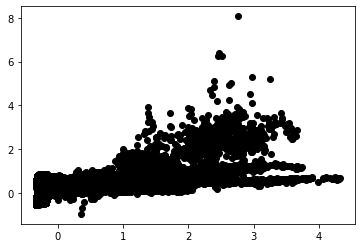

In [210]:
#viasualising the error between  the predicted value and the correct one
plt.scatter(y_test, y_pred,  color='black')


# Clustering


Objectif du clustering: diviser le CloseUSD en plusieurs clusters afin de faciliter leurs classification lors de la prediction

In [236]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(
   init="random",
    n_clusters=5,
       n_init=10,
       max_iter=300,
       random_state=0
   )

In [237]:
dfClust=df
dfClust=dfClust.drop(['Date'],axis=1)
kmeans.fit(dfClust)

KMeans(init='random', n_clusters=5, random_state=0)

In [266]:
# The lowest SSE value
kmeans.inertia_
identified_clusters = kmeans.fit_predict(dfClust)
identified_clusters

array([3, 3, 3, ..., 3, 3, 3])

In [239]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[2.00746721e+03, 6.65222672e+00, 1.59004049e+01, 3.09635628e+00,
        1.07818613e+04, 1.08296048e+04, 1.07287572e+04, 1.07815919e+04,
        1.07815919e+04, 1.34743262e+10, 8.96210580e+03],
       [2.01112536e+03, 6.42816525e+00, 1.56965212e+01, 6.42799799e+00,
        9.92408035e+03, 9.98583393e+03, 9.85209162e+03, 9.92176836e+03,
        9.92176836e+03, 3.02224885e+09, 6.02222784e+03],
       [2.01487179e+03, 6.54871795e+00, 1.71282051e+01, 3.00000000e+00,
        1.35949282e+04, 1.37320328e+04, 1.34142318e+04, 1.35809041e+04,
        1.35809041e+04, 4.15278179e+10, 1.12721504e+04],
       [1.99966454e+03, 6.54326752e+00, 1.58594996e+01, 6.27542533e+00,
        7.50038406e+03, 7.54563876e+03, 7.45150946e+03, 7.49973062e+03,
        7.49948505e+03, 9.32302038e+07, 2.21729906e+03],
       [2.01311956e+03, 6.12530813e+00, 1.54338537e+01, 3.00000000e+00,
        1.38257383e+04, 1.38963595e+04, 1.37383783e+04, 1.38196450e+04,
        1.38196450e+04, 2.25188569e+10, 1.14703054e+

In [240]:
 # The number of iterations required to converge
kmeans.n_iter_

88

In [241]:
kmeans.labels_

array([3, 3, 3, ..., 3, 3, 3])

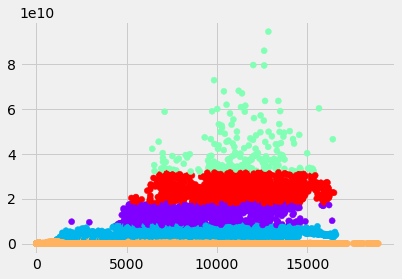

In [267]:
# to visualize the clusters
data_with_clusters = dfClust.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['CloseUSD'],data_with_clusters['Volume'],c=data_with_clusters['Clusters'],cmap='rainbow')

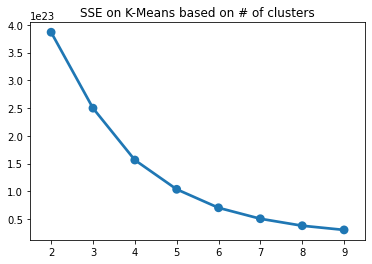

In [245]:
# plotting the distance of each number of clusters
import seaborn as sns
np.random.seed(42)
inertia = []# Iterating the process
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(dfClust)
  # Extract the error of the model
    inertia.append(model.inertia_)# Visualize the model
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.title('SSE on K-Means based on # of clusters')
plt.show()

# Classification

In [82]:
dfClass=df
dfClass=dfClass.drop(['Date'],axis=1)
dfClass.dtypes

day            int64
mm             int64
year           int64
Index          int32
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
CloseUSD     float64
dtype: object

In [83]:
dfClass["CloseUSD"][1]
dfClass["CloseUSD"].shape

(104224,)

In [84]:
dfff=pd.DataFrame(dfClass,columns=["CloseClass"])
dfff.shape

(104224, 1)

In [85]:
for k in range(104224) :
    if(dfClass["CloseUSD"][k]<=dfClass["CloseUSD"].quantile(0.2)):
        dfff["CloseClass"][k]=1
    elif(dfClass["CloseUSD"][k]<=dfClass["CloseUSD"].quantile(0.4)):
        dfff["CloseClass"][k]=2
    elif(dfClass["CloseUSD"][k]<=dfClass["CloseUSD"].quantile(0.6)):
        dfff["CloseClass"][k]=3
    elif(dfClass["CloseUSD"][k]<=dfClass["CloseUSD"].quantile(0.8)):
        dfff["CloseClass"][k]=4
    else :
        dfff["CloseClass"][k]=5
    

In [86]:
dfff["CloseClass"] = pd.to_numeric(dfff["CloseClass"])
df = pd.concat([dfClass,  dfff], axis=1)
df.columns

Index(['day', 'mm', 'year', 'Index', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'CloseUSD', 'CloseClass'],
      dtype='object')

In [87]:
df=df.drop(['CloseUSD'],axis=1)
df.columns

Index(['day', 'mm', 'year', 'Index', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'CloseClass'],
      dtype='object')

In [93]:
df.corr()['CloseClass'].sort_values(ascending = False)

CloseClass    1.000000
day           0.396773
Volume        0.374793
Close         0.158480
Adj Close     0.158468
Low           0.158398
Open          0.158374
High          0.158354
year         -0.004002
mm           -0.011251
Index        -0.113701
Name: CloseClass, dtype: float64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['CloseClass'], axis=1),
    df["CloseClass"],
    test_size= 0.3,  
    random_state=0
)
Scaler=RobustScaler()

X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

## methode 1 : Random forest

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#grid search helps us get the best parameters for our model
RF = RandomForestClassifier()
param_grid = {
              'criterion' : ['gini', 'entropy'],             
              'max_depth' : np.arange(1,15),      
             }
grid = GridSearchCV(RF, param_grid=param_grid , cv=5)
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [90]:
grid.fit(X_train, y_train)
print('best parameters',grid.best_params_)
print('grid score ',grid.best_score_)

best parameters {'criterion': 'entropy', 'max_depth': 13}
grid score  0.9995202559676898


In [91]:
T=grid.best_params_
RF = RandomForestClassifier(random_state=0,max_depth=T['max_depth'],criterion=T['criterion'])
RF.fit(X_train, y_train)
print('Le train score est :', RF.score(X_train, y_train))
print('Le test score est :', RF.score(X_test, y_test))

Le train score est : 1.0
Le test score est : 0.9997441473711143


## methode2 : XGBOOST

In [94]:
import xgboost as xgb
param_grid=  { 'max_depth' : [3,4,5] , 
               'learning_rate': [0.1,0.01,0.05],
               'gamma' : [0,0.25,1.0]  
               }

grid = GridSearchCV(xgb.XGBClassifier(), param_grid=param_grid , cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

grid.best_params_
grid.best_score_

C:\Users\khalil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9996299116659874

In [96]:
T=grid.best_params_
xgboost= xgb.XGBClassifier(objective='binary:logistic',max_depth=T['max_depth'],learning_rate=T['learning_rate'],gamma=T['gamma'])
xgboost.fit( X_train, y_train)
print('Le train score est :', xgboost.score(X_train, y_train))
print('Le test score est :', xgboost.score(X_test, y_test))

[00:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Le train score est : 0.999931465540874
Le test score est : 0.9996801842138928


## Modele 3 : KNN


In [97]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors' : np.arange(10,20),
              'metric' : ['euclidean', 'manhattan','minkowski'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid , cv=5,n_jobs=-1)

grid.fit(X_train, y_train)
grid.best_params_

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 11}

In [98]:
T=grid.best_params_
KNN = KNeighborsClassifier(n_neighbors=T['n_neighbors']  ,metric=T['metric'] ,algorithm=T['algorithm'])
KNN.fit( X_train, y_train)
print('Le train score est :', KNN.score(X_train, y_train))
print('Le test score est :', KNN.score(X_test, y_test))

Le train score est : 0.9854432808816272
Le test score est : 0.9799795317896891


In [109]:
from sklearn.metrics import roc_auc_score, auc,accuracy_score

y_pred = KNN.predict(X_test)

print('KNN accuracy %s' % accuracy_score(y_pred, y_test))
y_pred = xgboost.predict(X_test)

print('xgboost accuracy %s' % accuracy_score(y_pred, y_test))
y_pred = RF.predict(X_test)

print('random forest accuracy %s' % accuracy_score(y_pred, y_test))


KNN accuracy 0.9799795317896891
xgboost accuracy 0.9996801842138928
random forest accuracy 0.9997441473711143
